## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

    
    

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


### Importing the data

In [385]:
df=pd.read_csv("Churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Understanding the data

In [370]:
df['Churn'].value_counts() 

No     5174
Yes    1869
Name: Churn, dtype: int64

In [371]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [386]:
df.replace(' ', np.nan, inplace=True) #replacing empty space to NaN to recognise missing values

In [387]:
df.isna().sum() #sum of missing values for every column

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Data Manipulation

In [388]:
df.dropna(axis=0, how='any',inplace=True) # removing rows which have any value is NaN

In [389]:
q = df["MonthlyCharges"].quantile(0.90) # removing outliers

In [390]:
df[df["MonthlyCharges"] < q]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No


In [395]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges']) # change the format from object to numeric data type

In [391]:
# we’ll convert the categorical values into numeric values, so our ML algorithms can process the data.
df['gender'].replace(['Male','Female'],[0,1],inplace=True)
df['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)

In [392]:
df.drop(columns=['customerID'],inplace=True) #remove the columns not used in the predictive model.

In [394]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


### Data Visualization

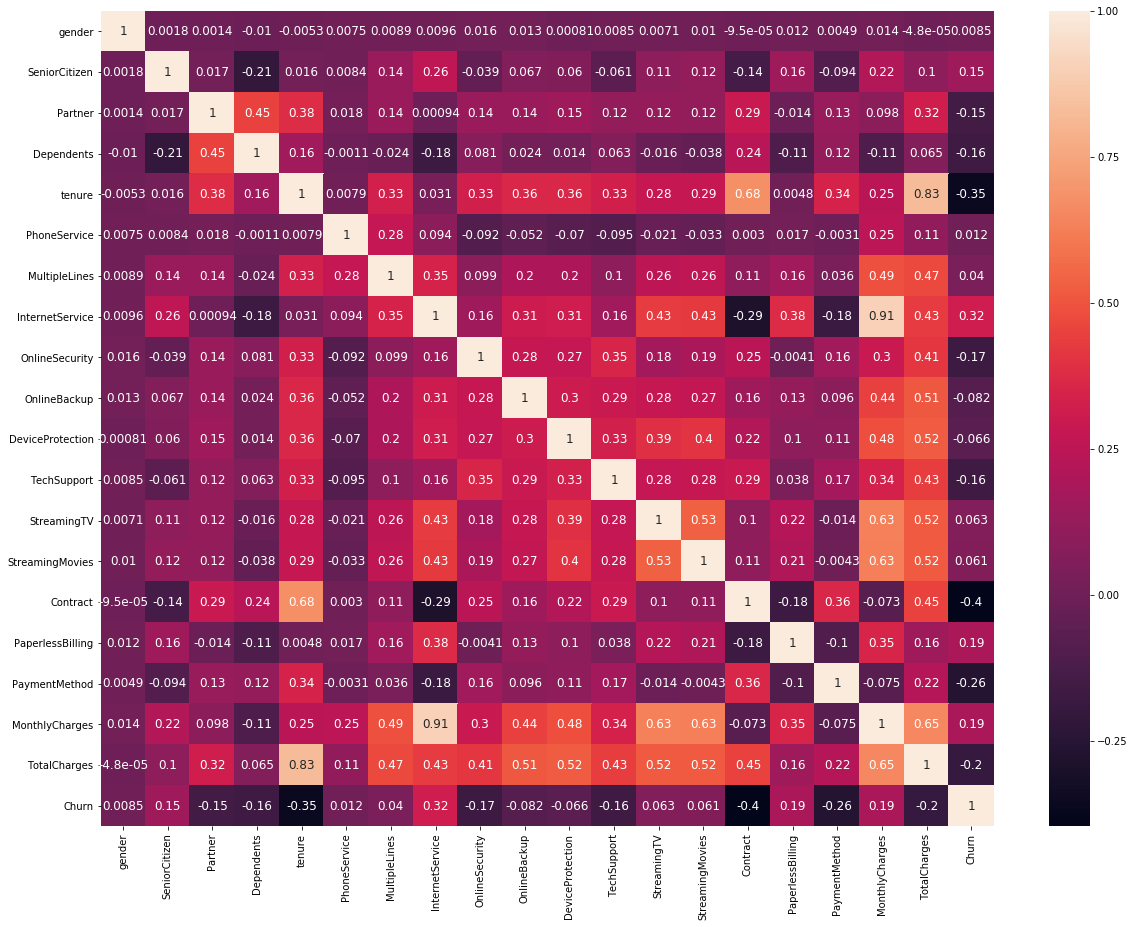

In [396]:
#To decide which features of the data to include in our predictive churn model
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [343]:
#Total charges and monthly charges are highly correlated

df.drop(columns=['TotalCharges'],inplace=True) #remove TotalCharges column from the dataframe

In [351]:
df['Churn'].value_counts() #no. of values for different category in target column

0    5163
1    1869
Name: Churn, dtype: int64

In [344]:
#To balance the data set, we can randomly duplicate observations from the minority class.
#This is also known as re-sampling with replacement

from sklearn.utils import resample
 
data_majority = df[df['Churn']==0]
data_minority = df[df['Churn']==1]
 
data_minority_upsampled = resample(data_minority,replace=True,n_samples=5163)
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
data_upsampled['Churn'].value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

### Implement Machine Learning Models

### Logistic regression

In [355]:
train, test = train_test_split(data_upsampled, test_size = 0.25) #perform splitting for training and testing
 
train_y_upsampled = train['Churn']
test_y_upsampled = test['Churn']
 
train_x_upsampled = train
train_x_upsampled.pop('Churn')
test_x_upsampled = test
test_x_upsampled.pop('Churn')
 
logisticRegr = LogisticRegression()
logisticRegr.fit(X=train_x_upsampled, y=train_y_upsampled)
 
test_y_pred = logisticRegr.predict(test_x_upsampled)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x_upsampled, test_y_upsampled)))


Accuracy of logistic regression classifier on test set: 0.76


### Decision tree

In [356]:
from sklearn.tree import DecisionTreeClassifier
decisiontr = DecisionTreeClassifier()
decisiontr.fit(X=train_x_upsampled, y=train_y_upsampled)
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(decisiontr.score(test_x_upsampled, test_y_upsampled)))


Accuracy of Decision tree classifier on test set: 0.87


### Random Forest

In [357]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X=train_x_upsampled, y=train_y_upsampled)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(randomForest.score(test_x_upsampled, test_y_upsampled)))

Accuracy of random forest classifier on test set: 0.89


### Feature Importance

In [366]:
feat_labels =train_x_upsampled.columns

In [367]:
for feature in zip(feat_labels, randomForest.feature_importances_):  #features important for model predictions
    print(feature)

('gender', 0.030281471686710876)
('SeniorCitizen', 0.017965261409991405)
('Partner', 0.026894830780450463)
('Dependents', 0.02172502586755316)
('tenure', 0.20266949710277093)
('PhoneService', 0.008861524314467616)
('MultipleLines', 0.018065777647616143)
('InternetService', 0.05836469716670236)
('OnlineSecurity', 0.019656881269222676)
('OnlineBackup', 0.02189385267063903)
('DeviceProtection', 0.02048603682860305)
('TechSupport', 0.02141733948591884)
('StreamingTV', 0.01866327709543979)
('StreamingMovies', 0.01902762346107032)
('Contract', 0.18156052542708362)
('PaperlessBilling', 0.023197555432119973)
('PaymentMethod', 0.057247901428919924)
('MonthlyCharges', 0.2320209209247198)


## Final Conclusions
From the above analysis, we can see that Decision tree and Random Forest performed better than Logistic regression for customer churn analysis for this particular dataset.<br>
Throughout the analysis, I have learned several important things:
1. Features such as MonthlyCharges, tenure and Contract appear to play a role in customer churn.
2. Features such as SeniorCitizen, OnlineBackup, PaperlessBilling and many more are not much important for this particular dataset.
3. We can implement different models and test quickly using the Python sklearn package.
